In [17]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import scipy.misc
print(torch.__version__)
device = torch.device('cuda:1'if torch.cuda.is_available()else 'cpu')





transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.13,), (0.308,))])




epochs = 5;
lr = 0.0001;
batch_size = 64;
num_classes = 10;





train_dataset = torchvision.datasets.MNIST(root = '/home/anil/data',train =True,transform = transform,download = True)
test_dataset = torchvision.datasets.MNIST(root='home/anil/data',
                                          train=False, 
                                          transform=transform,download = True)


valid_dataset = torchvision.datasets.MNIST(root = '/home/anil/data',train =True,transform = transform,download = True)




num_train = len(train_dataset)
indices = list(range(num_train))
split=int(np.floor(0.2*num_train))




tr_idx,valid_idx = indices[split:],indices[:split]




np.random.seed(0)
np.random.shuffle(indices)



trainsampler = SubsetRandomSampler(tr_idx)
validsampler = SubsetRandomSampler(valid_idx)



trainloader = torch.utils.data.DataLoader(dataset = train_dataset,sampler = trainsampler,batch_size = batch_size,shuffle = False)
testloader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size , shuffle=True)
validloader = torch.utils.data.DataLoader(dataset = train_dataset,sampler = validsampler,batch_size = batch_size,shuffle = False)




#to show image
def process_normal_img(img):
    img = img*0.3081+0.1307
    npimg = img.numpy()
    return (np.transpose(npimg,(1,2,0)))






class ConvNet(nn.Module):
     def __init__(self,num_classes = 10):
            super (ConvNet,self).__init__()
            self.layer1 = nn.Sequential(
                   nn.Conv2d(1, 32 , kernel_size =3 , stride = 1, padding = 1), #25088
                   nn.BatchNorm2d(32),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2, stride = 2))
            self.layer2 = nn.Sequential(
                   nn.Conv2d(32,32,kernel_size = 3 , stride = 1,padding = 1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2 , stride = 2))
            self.fc1 = nn.Linear(7*7*32,500)
            self.fc2 = nn.Linear(500,10)
            
    
     def forward(self,x):
            x1 = self.layer1(x)
            x2 = self.layer2(x1)
            out = x2.reshape(x2.size(0),-1)
            out = self.fc1(out)
            out = self.fc2(out)
            return(x1,x2,out)



0.4.1


In [18]:
modelroot = '/home/anil/data/MNIST/MNISTsaved/saved_model'
#torch.save(model.state_dict(), modelroot)

In [32]:
#reloading
model = ConvNet()
model.load_state_dict(torch.load(modelroot))
print(model)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [20]:
data = iter(trainloader)
images,labels = data.next()
trainimages = process_normal_img(torchvision.utils.make_grid(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


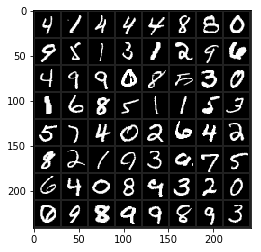

In [21]:
plt.imshow(trainimages)

In [45]:
def process_network_img(img):
    npimg = img.detach().numpy()
    return (np.transpose(npimg,(1,2,0)))


In [51]:
conv1out,conv2out,final_out = model(images)
p = torch.zeros([64,1,14,14])


torch.Size([64, 32, 14, 14])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Conv1 Filter: 1 output
Conv1 Filter: 2 output
Conv1 Filter: 5 output
Conv1 Filter: 6 output
Conv1 Filter: 8 output
Conv1 Filter: 9 output
Conv1 Filter: 15 output
Conv1 Filter: 25 output
Conv1 Filter: 30 output
Conv1 Filter: 31 output


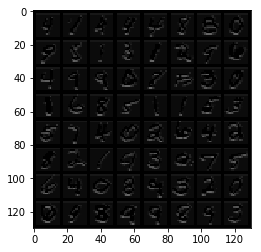

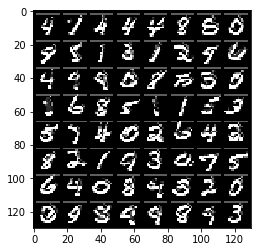

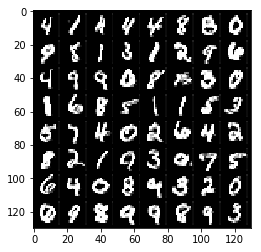

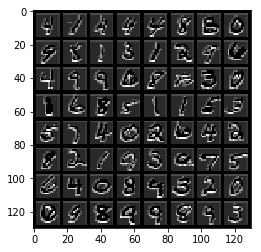

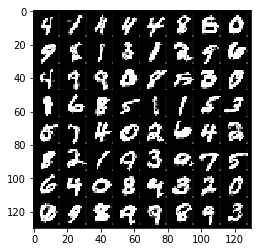

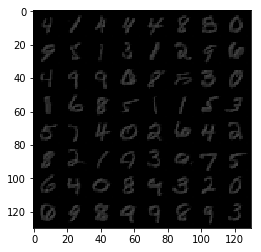

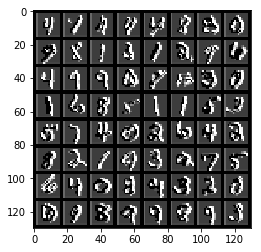

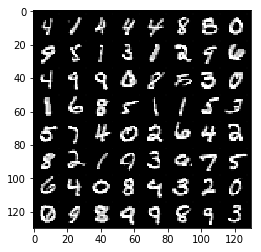

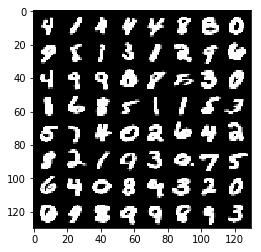

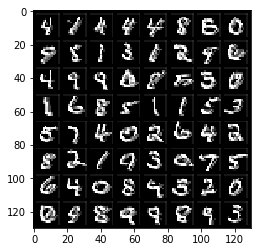

In [48]:
for i in [1,2,5,6,8,9,15,25,30,31]:
    p[:,0,:,:] = conv1out[:,i,:,:]
    trnimg = process_network_img(torchvision.utils.make_grid(p))
    plt.figure()
    plt.imshow(trnimg)
    print('Conv1 Filter:',repr(i),'output')
     

/home/anil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Conv2 Filter: 1 output
Conv2 Filter: 2 output
Conv2 Filter: 5 output
Conv2 Filter: 6 output
Conv2 Filter: 8 output
Conv2 Filter: 9 output
Conv2 Filter: 15 output


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Conv2 Filter: 25 output
Conv2 Filter: 30 output
Conv2 Filter: 31 output


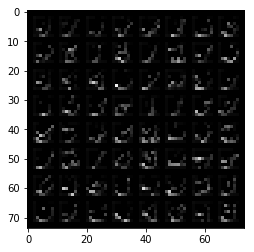

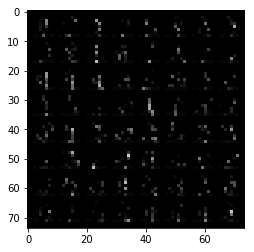

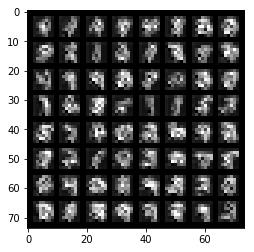

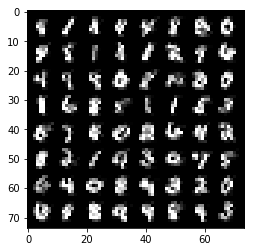

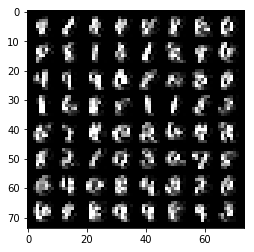

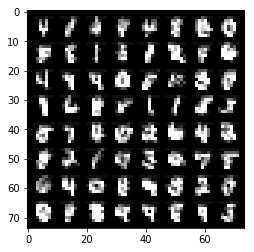

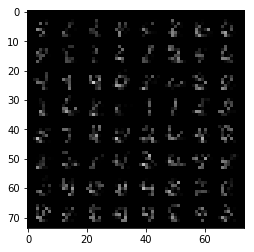

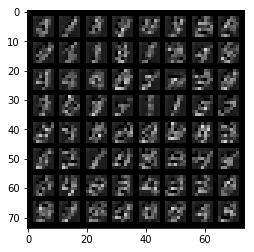

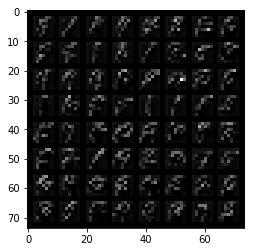

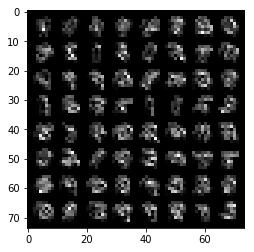

In [54]:
import scipy.misc
q = torch.zeros([64,1,7,7])
for i in [1,2,5,6,8,9,15,25,30,31]:
    q[:,0,:,:] = conv2out[:,i,:,:]
    trnimg = process_network_img(torchvision.utils.make_grid(q))
    
    plt.figure()
    print('Conv2 Filter:',repr(i),'output')
    plt.imshow(trnimg)
    
    scipy.misc.imsave('Conv2_Filter' + repr(i) + '_output.png', trnimg)